<a href="https://colab.research.google.com/github/sarikamohan08/prediction-of-election-results/blob/main/Code/ml_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING PROJECT CAT 2**


DATE: 26-04-2021




**IMPORTING THE LIBRARIES**



In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from  sklearn import metrics
from sklearn.metrics import accuracy_score

**DOWNLOADING THE NLP PACKAGES**


In [ ]:

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**FUNCTIONS**

**WORD CLOUD**


In [ ]:
def create_cloud(data):
  cloud  = WordCloud(background_color ='white',max_words= 100,stopwords=set(STOPWORDS))
  cloud.generate(data)
  plt.imshow(cloud)
  plt.show()

**REMOVING THE PUNCTUATION**

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',",","-","\n","#",'@',"www","//","http"))
    return final


**DATA PREPROCESSING**

In [ ]:
class preprocess:
  def Tokenize(self,datacolumn):
    list =[]
    for i in datacolumn:
      i = word_tokenize(i)
      list.append(i)

    return list
     
  def remove_stopwords(self,datacolumn):
    Stopwords = set(STOPWORDS)
    list=[]
    for i in datacolumn:
      i = [x for x in i if x not in Stopwords]
      list.append(i)
    #print(i)
    return list
  
  def lemmatization(self,datacolumn):
    lemmatizer = WordNetLemmatizer()
    list=[]
    for i in datacolumn:
      list2=[]
      for tokens in i:
        tokens=lemmatizer.lemmatize(tokens)
        list2.append(tokens)
      list.append(list2)
    return list

**CHANGING LIST TO SENTENCE**

In [ ]:
def to_string(datacolumn):
  for i in range(len(datacolumn)):
    datacolumn[i] = ' '.join([str(elem) for elem in datacolumn[i]])
  return datacolumn

**ADMK DATA**

**IMPORTING DATA**

In [ ]:
admk_data = pd.read_csv("/content/admk1.csv",encoding ='utf-8')
admk_data.head()

,text,labels
0,"\n\nAs to preclude the DMK, the AIADMK, the DM...",1
1,"\nOver the past 10 years, the people dissatisf...",0
2,\n\nPersonally speaking on the phone in the ca...,0
3,"\n\nTo keep safe from TN rowdism, corruption a...",1
4,\n\nDMK-AIADMK state autonomy until today did ...,0


**CREATING THE WORD CLOUD**

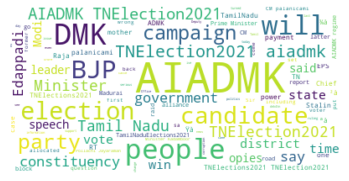

In [ ]:
admk_data1  = open('/content/admk.txt','r').read()
text=admk_data1
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**REMOVING THE EMPTY SPACE**

In [ ]:
admk_data['text'].dropna(inplace=True)

**UPPERCASE TO LOWER CASE**

In [ ]:
admk_data['text'] = [entry.lower() for entry in admk_data['text']]

**REMOVING THE PUNCTUATION**

In [ ]:
admk_data['text'] = admk_data['text'].apply(remove_punctuation)
admk_data.head(3)

,text,labels
0,as to preclude the dmk the aiadmk the dmk and ...,1
1,over the past 10 years the people dissatisfied...,0
2,personally speaking on the phone in the case o...,0


**TOKENIREZATION, LEMMATIZATION, REMOVING STOPWORDS**





In [ ]:
token = preprocess()
list1=token.Tokenize(admk_data['text'])
#list1=np.array(list1)
list1=token.remove_stopwords(list1)
list1 = token.lemmatization(list1)
df = pd.DataFrame(data=[list1],index=['text'])
df=df.T
df.head()

,text
0,"[preclude, dmk, aiadmk, dmk, aiadmk, preclude,..."
1,"[past, 10, year, people, dissatisfied, aiadmk,..."
2,"[personally, speaking, phone, case, reservatio..."
3,"[keep, safe, tn, rowdism, corruption, goondaism]"
4,"[dmkaiadmk, state, autonomy, today]"


In [ ]:
df1 = df.copy()

**DATA VISUALIZATION**

In [ ]:
positive = admk_data[admk_data['labels'] == 1]
negative = admk_data[admk_data['labels'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


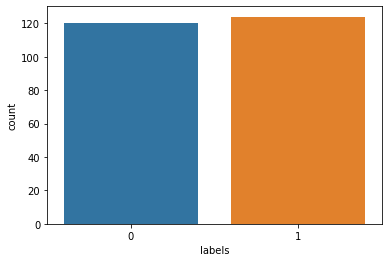

In [ ]:
sns.countplot(admk_data["labels"])

In [ ]:
admk_data.head()

,text,labels
0,as to preclude the dmk the aiadmk the dmk and ...,1
1,over the past 10 years the people dissatisfied...,0
2,personally speaking on the phone in the case o...,0
3,to keep safe from tn rowdism corruption and go...,1
4,dmkaiadmk state autonomy until today did what,0


In [ ]:
df1.head()

,text
0,"[preclude, dmk, aiadmk, dmk, aiadmk, preclude,..."
1,"[past, 10, year, people, dissatisfied, aiadmk,..."
2,"[personally, speaking, phone, case, reservatio..."
3,"[keep, safe, tn, rowdism, corruption, goondaism]"
4,"[dmkaiadmk, state, autonomy, today]"


**changing the list to sentence**

In [ ]:
df1['text'] = to_string(df1['text'])

In [ ]:
df1.head()

,text
0,preclude dmk aiadmk dmk aiadmk preclude people...
1,past 10 year people dissatisfied aiadmk regime
2,personally speaking phone case reservation cm ...
3,keep safe tn rowdism corruption goondaism
4,dmkaiadmk state autonomy today


**MODEL BUILDING**

**TRAIN TEST SPLIT**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df1["text"],admk_data['labels'],test_size=0.3,random_state=40)


**VECTORIZATION**

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df1['text'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Train_X_Tfidf)

**NAIVE BAYES MODEL:**

In [ ]:
Naive_admk = naive_bayes.MultinomialNB()
Naive_admk.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive_admk.predict(Test_X_Tfidf)

In [ ]:
print("Naive Bayes for ADMK :  Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes for ADMK :  Accuracy Score ->  62.16216216216216


**CLASSFICATION METRICS FOR NAIVE BAYES**

In [ ]:
print(metrics.classification_report(predictions_NB, Test_Y))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56        25
           1       0.80      0.57      0.67        49

    accuracy                           0.62        74
   macro avg       0.63      0.65      0.61        74
weighted avg       0.69      0.62      0.63        74



In [ ]:
print(metrics.confusion_matrix(predictions_NB, Test_Y))

[[18  7]
 [21 28]]


In [ ]:
metrics.roc_auc_score(predictions_NB,Test_Y)

0.6457142857142857

**SUPPORT VECTOR MACHINE**

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**PREDICTIONS**

In [ ]:
predictions_SVM = SVM.predict(Test_X_Tfidf )


**ACCURACY**

In [ ]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  60.810810810810814


**CLASSIFICATION METRICS OF SVM**

In [ ]:

print(metrics.classification_report(predictions_SVM, Test_Y))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62        38
           1       0.60      0.58      0.59        36

    accuracy                           0.61        74
   macro avg       0.61      0.61      0.61        74
weighted avg       0.61      0.61      0.61        74



In [ ]:
print(metrics.confusion_matrix(predictions_SVM, Test_Y))

[[24 14]
 [15 21]]


In [ ]:
metrics.roc_auc_score(predictions_SVM,Test_Y)

0.6074561403508771

**AIADMK TESTING**

**IMPORT THE DATA**

In [ ]:
admk_test=pd.read_csv("/content/admk_test.csv")
admk_test.head()

,text-eng
0,EPS climbing back to the throne
1,Minister of charge with violating election rul...
2,Let us all hope that for the sake of TN and In...
3,Edappadi Palanisamy formed an alliance wit #PM...
4,The newspaper marketing campaign by all major ...


**PREPROCESSING THE DATA**

**UPPER CASE TO LOWER CASE**

In [ ]:
admk_test['text-eng'] = [entry.lower() for entry in admk_test['text-eng']]

**REMOVE PUNCTUATION**

In [ ]:
admk_test['text-eng'] = admk_test['text-eng'].apply(remove_punctuation)
admk_test.head(3)

,text-eng
0,eps climbing back to the throne
1,minister of charge with violating election rul...
2,let us all hope that for the sake of tn and in...


**TOKENIZATION, LEMMATIZATION, STOPWORS REMOVAL**

In [ ]:

list_tokenized=token.Tokenize(admk_test['text-eng'])
#list1=np.array(list1)
list_tokenized=token.remove_stopwords(list_tokenized)
list_tokenized = token.lemmatization(list_tokenized)
data = pd.DataFrame(data=[list_tokenized],index=['text'])
data=data.T
data.head()

,text
0,"[eps, climbing, back, throne]"
1,"[minister, charge, violating, election, rule, ..."
2,"[let, u, hope, sake, tn, india, least, tnelect..."
3,"[edappadi, palanisamy, formed, alliance, wit, ..."
4,"[newspaper, marketing, campaign, major, newspa..."


In [ ]:
data1 = data.copy()

**CHANGING THE LIST TO SENTENCE**

In [ ]:
def to_string2(datacolumn):
  for i in range(len(datacolumn)):
    datacolumn[i] = ' '.join([str(elem) for elem in datacolumn[i]])
   # 3print(datacolumn[i])
  return datacolumn 

data1['text']=to_string2(data1['text'])

In [ ]:
data1.head()

,text
0,eps climbing back throne
1,minister charge violating election rule espive...
2,let u hope sake tn india least tnelection2021 ...
3,edappadi palanisamy formed alliance wit pmk & ...
4,newspaper marketing campaign major newspaper a...


**VECTORIZATION**

In [ ]:
vectorized_test= Tfidf_vect .transform(data1['text'])

**FITTING THE SVM MODEL**

In [ ]:
predictions_SVM = SVM.predict(vectorized_test)

**PREDICTIONS**

In [ ]:
predictions_SVM

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0])

**CONVERTING THE ARRAY INTO DATAFRAME**




In [ ]:
my_array = np.array(predictions_SVM)

df = pd.DataFrame(my_array, columns = ['Column_A'])

#print(df)
#print(type(df))

**visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


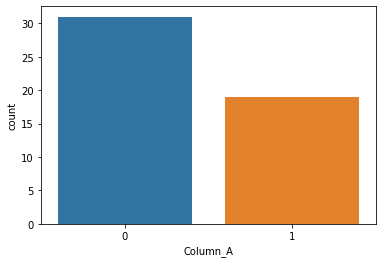

In [ ]:
sns.countplot(df["Column_A"])

**FITTING THE NAIVE BAYES MODEL**

In [ ]:
predictions_NB = Naive_admk.predict(vectorized_test)


**PREDICTIONS**

In [ ]:
predictions_NB

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0])

**CONVERTING THE ARRAY INTO DATAFRAME**

In [ ]:
my_array1 = np.array(predictions_NB)

df1 = pd.DataFrame(my_array1, columns = ['admk_pred_1'])

#print(df1)
#print(type(df1))

In [ ]:
df1['admk_pred_1'].value_counts()

1    25
0    25
Name: admk_pred_1, dtype: int64

**VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


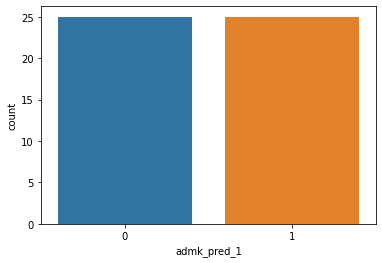

In [ ]:
sns.countplot(df1["admk_pred_1"])

**DMK DATASET**


**IMPORTING THE DATASET**

In [ ]:
dmk_data = pd.read_csv("/content/dmk.csv",encoding ='utf-8')
dmk_data.head()

,text,labels
0,"\n\nAs to preclude the DMK, the AIADMK, the DM...",0
1,"\n\nOver the past 10 years, the people dissati...",1
2,DMK government had to do in Corona\n\n,1
3,The family rule is a war between democracy in ...,0
4,"CNN's AIADMK, the DMK will cenc Ammo. # TNElec...",1


**WORD CLOUD**

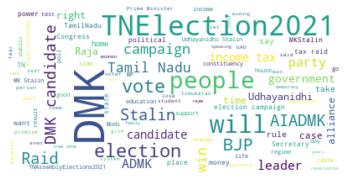

In [ ]:
dmk_data1  = open('/content/dmk.txt','r').read()
text=dmk_data1
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**DROPING THE EMPTY ROWS**

In [ ]:
dmk_data['text'].dropna(inplace=True)

**CHANGING FORM UPPERCASE TO LOWER CASE**

In [ ]:
dmk_data['text'] = [entry.lower() for entry in dmk_data['text']]

**REMOVING PUNCTUATION**

In [ ]:
dmk_data['text'] = dmk_data['text'].apply(remove_punctuation)
dmk_data.head(3)

,text,labels
0,as to preclude the dmk the aiadmk the dmk and ...,0
1,over the past 10 years the people dissatisfied...,1
2,dmk government had to do in corona,1


**TOKENIZATION,LEMMATIZATION ,REMOVING STOPWORDS**

In [ ]:
list_tokenized1=token.Tokenize(dmk_data['text'])
#list1=np.array(list1)
list_tokenized1=token.remove_stopwords(list_tokenized1)
list_tokenized1 = token.lemmatization(list_tokenized1)
df_dmk = pd.DataFrame(data=[list_tokenized1],index=['text'])
df_dmk=df_dmk.T
df_dmk.head()

,text
0,"[preclude, dmk, aiadmk, dmk, aiadmk, preclude,..."
1,"[past, 10, year, people, dissatisfied, rule, a..."
2,"[dmk, government, corona]"
3,"[family, rule, war, democracy, election, tamil..."
4,"[cnn, 's, aiadmk, dmk, will, cenc, ammo, tnele..."


In [ ]:
df_dmk1 = df_dmk.copy()

**DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


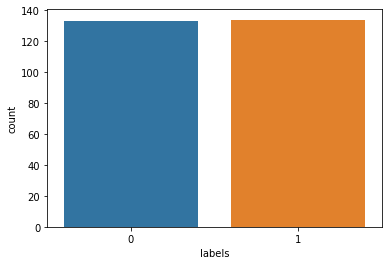

In [ ]:
sns.countplot(dmk_data["labels"])

In [ ]:
dmk_data.head()

,text,labels
0,as to preclude the dmk the aiadmk the dmk and ...,0
1,over the past 10 years the people dissatisfied...,1
2,dmk government had to do in corona,1
3,the family rule is a war between democracy in ...,0
4,cnn's aiadmk the dmk will cenc ammo tnelectio...,1


**CHANGING LIST TO SENTENCE**

In [ ]:
df_dmk1['text'] = to_string(df_dmk1['text'])

In [ ]:
df_dmk1.head()

,text
0,preclude dmk aiadmk dmk aiadmk preclude people...
1,past 10 year people dissatisfied rule aiadmk d...
2,dmk government corona
3,family rule war democracy election tamil nadu ...
4,cnn 's aiadmk dmk will cenc ammo tnelection202...


**TRAIN TEST SPLIT**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_dmk1["text"],dmk_data['labels'],test_size=0.25, random_state=40)

**VECTORIZATION**

In [ ]:
Tfidf_vect_dmk= TfidfVectorizer(max_features=5000)
Tfidf_vect_dmk.fit(df_dmk1['text'])

Train_X_Tfidf = Tfidf_vect_dmk.transform(Train_X)
Test_X_Tfidf = Tfidf_vect_dmk.transform(Test_X)

**MODEL BUILDING**

**NAIVE BAYES**

In [ ]:
Naive_dmk = naive_bayes.MultinomialNB()
Naive_dmk.fit(Train_X_Tfidf,Train_Y)
predictions_NB_dmk = Naive_dmk.predict(Test_X_Tfidf)

**ACCURACY**

In [ ]:
print("Naive Bayes for DMK :  Accuracy Score:",accuracy_score(predictions_NB_dmk, Test_Y)*100)

Naive Bayes for DMK :  Accuracy Score: 56.71641791044776


**CLASSIFICATION METRICS FOR NAIVE BAYES**

In [ ]:
metrics.roc_auc_score(predictions_NB_dmk,Test_Y)

0.5677361853832442

In [ ]:
print(metrics.classification_report(predictions_NB_dmk, Test_Y))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        33
           1       0.58      0.53      0.55        34

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [ ]:
print(metrics.confusion_matrix(predictions_NB_dmk, Test_Y))

[[20 13]
 [16 18]]


**SVM**

In [ ]:
SVM_dmk = svm.SVC(C=2.0, kernel='linear', degree=3, gamma='auto')
SVM_dmk.fit(Train_X_Tfidf,Train_Y)
predictions_SVM_dmk = SVM_dmk.predict(Test_X_Tfidf)


**ACCURACY**

In [ ]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_dmk, Test_Y)*100)

SVM Accuracy Score ->  52.23880597014925


**CLASSIFCATION METRICS FOR SVM**

In [ ]:
print(metrics.classification_report(predictions_SVM_dmk, Test_Y))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        44
           1       0.35      0.48      0.41        23

    accuracy                           0.52        67
   macro avg       0.51      0.51      0.50        67
weighted avg       0.56      0.52      0.53        67



In [ ]:
print(metrics.confusion_matrix(predictions_SVM_dmk, Test_Y))

[[24 20]
 [12 11]]


In [ ]:
metrics.roc_auc_score(predictions_SVM_dmk,Test_Y)

0.5118577075098814

**DMK TESTING**

**IMPORTING THE DATASET**

In [ ]:
dmk_test=pd.read_csv("/content/dmk_test.csv")
dmk_test.head()

,text
0,There is diff between DMK leader and lier
1,If the state kitaikkappokutu dawn to dark utay...
2,The DMK is sure to lose the election
3,Thumbs up DMKLosingTN Sureshot These type of T...
4,DMK party members removed dish tv dish near ce...


**CHANGING UPPERCASE TO LOWERCASE**

In [ ]:
dmk_test['text'] = [entry.lower() for entry in dmk_test['text']]

**REMOVING PUNCTUATION**

In [ ]:
dmk_test['text'] = dmk_test['text'].apply(remove_punctuation)
dmk_test.head(3)

,text
0,there is diff between dmk leader and lier
1,if the state kitaikkappokutu dawn to dark utay...
2,the dmk is sure to lose the election


**TOKENIZATION,LEMMATIZATION ,REMOVING STOPWORDS**

In [ ]:
list_tokenized2=token.Tokenize(dmk_test['text'])
#list1=np.array(list1)
list_tokenized2=token.remove_stopwords(list_tokenized2)
list_tokenized2 = token.lemmatization(list_tokenized2)
df_data_test = pd.DataFrame(data=[list_tokenized2],index=['text'])
df_data_test=df_data_test.T
df_data_test.head()

,text
0,"[diff, dmk, leader, lier]"
1,"[state, kitaikkappokutu, dawn, dark, utayacuri..."
2,"[dmk, sure, lose, election]"
3,"[thumb, dmklosingtn, sureshot, type, tamilnadu..."
4,"[dmk, party, member, removed, dish, tv, dish, ..."


In [ ]:
df_data_test1 = df_data_test.copy()

**CHANGING LIST TO SENTENCE**

In [ ]:
df_data_test1['text']=to_string2(df_data_test1['text'])

**VECTORIZATION**

In [ ]:
vectorized_dmk= Tfidf_vect_dmk.transform(df_data_test1['text'])


**SVM MODEL PREDICTION**

In [ ]:
predictions_SVM_dmk = SVM_dmk.predict(vectorized_dmk)


In [ ]:
predictions_SVM_dmk

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1])

**CHANGING FROM ARRAY TO DATAFRAME**

In [ ]:
my_array = np.array(predictions_SVM)

df3 = pd.DataFrame(my_array, columns = ['dmk_pred'])

#print(df3)
#print(type(df3))

In [ ]:
df3['dmk_pred'].value_counts()

0    31
1    19
Name: dmk_pred, dtype: int64

**VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


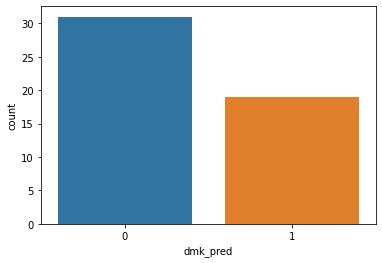

In [ ]:
sns.countplot(df3['dmk_pred'])

**PREDICTION FOR NAIVE BAYES MODEL**

In [ ]:
predictions_NB_dmk = Naive_dmk.predict(vectorized_dmk)


In [ ]:
predictions_NB_dmk

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

**CHANGING FROM ARRAY TO DATAFRAME**

In [ ]:
my_array1= np.array(predictions_NB_dmk)

df4 = pd.DataFrame(my_array1, columns = ['dmk_pred_1'])

#print(df4)
#print(type(df4))

In [ ]:
df4['dmk_pred_1'].value_counts()

1    28
0    22
Name: dmk_pred_1, dtype: int64

**VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


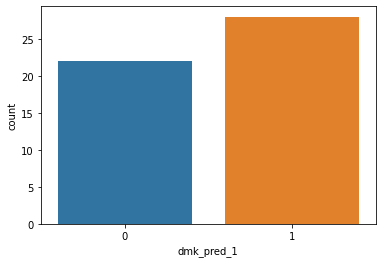

In [ ]:
sns.countplot(df4['dmk_pred_1'])

**COMPARSION:**

**ADMK VS DMK  FOR SVM MODEL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


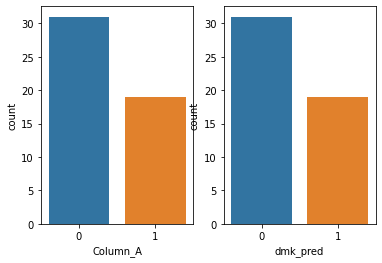

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['Column_A'], ax=ax[0])
sns.countplot(df3['dmk_pred'], ax=ax[1])
fig.show()

**ADMK VS DMK  FOR THE  MODEL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


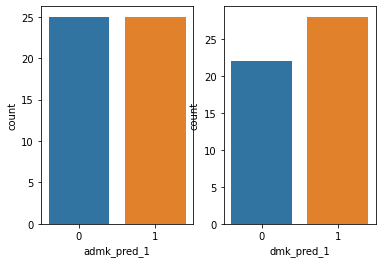

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(df1['admk_pred_1'], ax=ax[0])
sns.countplot(df4['dmk_pred_1'], ax=ax[1])
fig.show()